<a href="https://colab.research.google.com/github/giuschil/asset-management-etf-python/blob/main/asset_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import yfinance as yf
import pandas as pd

def scarica_dati(ticker, start_date, end_date):
    """
    Scarica i dati di chiusura al primo giorno del mese per un ETF.
    """
    dati = yf.download(ticker, start=start_date, end=end_date)['Close']
    # Filtra i dati per il primo giorno di ogni mese
    dati_mensili = dati.resample('MS').first()
    return dati_mensili



In [54]:
import yfinance as yf
import pandas as pd

def simula_portafoglio(tickers, pesi, investimento_iniziale, investimento_mensile, start_date, end_date):
    # Verifica che la somma dei pesi sia 1
    if abs(sum(pesi) - 1.0) > 1e-6:
        raise ValueError("La somma dei pesi deve essere pari a 1.")

    # Scarica i dati storici per ogni ETF
    dati = {}
    for ticker in tickers:
        # Assicurati di prendere solo la colonna 'Adj Close' (unidimensionale)
        dati[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

    # Inizializzazione del portafoglio
    portafoglio = pd.DataFrame(index=dati[tickers[0]].index)

    # Aggiungi i prezzi degli ETF
    for ticker in tickers:
        portafoglio[f'Prezzo {ticker}'] = dati[ticker]

    # Suddivisione dell'investimento iniziale in base ai pesi
    quote = {}
    for i, ticker in enumerate(tickers):
        capitale = investimento_iniziale * pesi[i]
        quote[ticker] = capitale / dati[ticker].iloc[0]  # Dividi per il prezzo iniziale

    # Inizializzazione delle colonne per le quote e valori
    for ticker in tickers:
        portafoglio[f'Quote {ticker}'] = [quote[ticker]] + [0] * (len(portafoglio) - 1)
        portafoglio[f'Valore {ticker}'] = [quote[ticker] * dati[ticker].iloc[0]] + [0] * (len(portafoglio) - 1)

    portafoglio['Valore Totale'] = 0.0

    # Simulazione mensile
    for i in range(1, len(portafoglio)):
        for j, ticker in enumerate(tickers):
            prezzo_corrente = dati[ticker].iloc[i]
            acquisto = (investimento_mensile * pesi[j]) / prezzo_corrente
            portafoglio.at[portafoglio.index[i], f'Quote {ticker}'] = portafoglio.at[portafoglio.index[i - 1], f'Quote {ticker}'] + acquisto
            portafoglio.at[portafoglio.index[i], f'Valore {ticker}'] = portafoglio.at[portafoglio.index[i], f'Quote {ticker}'] * prezzo_corrente

        # Calcola il valore totale del portafoglio
        portafoglio.at[portafoglio.index[i], 'Valore Totale'] = portafoglio.iloc[i][[f'Valore {ticker}' for ticker in tickers]].sum()

    return portafoglio

# Esempio di utilizzo
tickers = ['WSML.L', 'VUSA.L']  # Sostituisci con i tuoi ticker
pesi = [0.7, 0.3]  # Esempio di pesi
investimento_iniziale = 10000
investimento_mensile = 200
start_date = '2024-01-01'
end_date = '2025-01-01'

portafoglio = simula_portafoglio(tickers, pesi, investimento_iniziale, investimento_mensile, start_date, end_date)

print(portafoglio)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ValueError: Incompatible indexer with Series

# **Scarica dati**

In [98]:


# Parametri di simulazione
ticker1 = "VUSA.MI"  # Vanguard S&P 500 UCITS ETF
ticker2 = "IEMB.MI"  # iShares Core MSCI EM IMI UCITS ETF
ticker3 = "WSML.L" # l'iShares MSCI World Small Cap UCITS ETF (Acc)

start_date = "2020-01-01"
end_date = "2025-01-01"
peso1 = 0.65
peso2 = 0.25
peso3 = 0.15


investimento_iniziale = 10000  # €10,000
investimento_mensile = 250  # €200 al mese

# Scarica i dati
dati1 = scarica_dati(ticker1, start_date, end_date)
dati2 = scarica_dati(ticker2, start_date, end_date)
dati3 = scarica_dati(ticker3, start_date, end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [128]:
import yfinance as yf
import pandas as pd

def scarica_dati(tickers, pesi, investimento_iniziale, investimento_mensile, start_date, end_date):
    # Verifica che la somma dei pesi sia 1
    if abs(sum(pesi) - 1.0) > 1e-6:
        raise ValueError("La somma dei pesi deve essere pari a 1.")

    # Scarica i dati storici per ogni ETF
    dati = {}
    for ticker in tickers:
        # Scarica i dati con la colonna 'Close'
        df = yf.download(ticker, start=start_date, end=end_date)[['Close']]
        # Rinomina la colonna utilizzando il ticker
        df.columns = [ticker]
        dati[ticker] = df

    # Uniamo i dati degli ETF
    df_all = pd.concat(dati.values(), axis=1)
    df_all = df_all.fillna(method='ffill').fillna(method='bfill')  # Fill forward e backward per i giorni mancanti
    df_all = df_all.round(2)
    return df_all

# Esempio di utilizzo
tickers = ['VUSA.L', 'IEMB.L', 'WSML.L']  # Sostituisci con i tuoi ticker
pesi = [0.6, 0.25, 0.15]  # Esempio di pesi
investimento_iniziale = 10000
investimento_mensile = 200
start_date = '2020-01-01'
end_date = '2025-01-01'

df_all = scarica_dati(tickers, pesi, investimento_iniziale, investimento_mensile, start_date, end_date)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-128-70b121dfe818>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_all = df_all.fillna(method='ffill').fillna(method='bfill')  # Fill forward e backward per i giorni mancanti


In [115]:
def calcola_portafoglio(df_all, tickers, pesi, investimento_iniziale, investimento_mensile):
    # Verifica che la somma dei pesi sia 1
    if abs(sum(pesi) - 1.0) > 1e-6:
        raise ValueError("La somma dei pesi deve essere pari a 1.")

    # Inizializzazione del portafoglio
    portafoglio = pd.DataFrame(index=df_all.index)

    # Suddivisione dell'investimento iniziale in base ai pesi
    quote_iniziali = {}
    for i, ticker in enumerate(tickers):
        capitale = investimento_iniziale * pesi[i]
        quote_iniziali[ticker] = capitale / df_all[ticker].iloc[0]  # Dividi per il prezzo iniziale

    # Suddivisione dell'investimento mensile in base ai pesi
    quote_mensili = {}
    for i, ticker in enumerate(tickers):
        acquisto_mensile = (investimento_mensile * pesi[i]) / df_all[ticker].iloc[0]  # Dividi per il prezzo del primo giorno
        quote_mensili[ticker] = acquisto_mensile

    # Aggiungi le quote iniziali al portafoglio
    for ticker in tickers:
        portafoglio[f'Quote {ticker}'] = [quote_iniziali[ticker]] + [0] * (len(portafoglio) - 1)
        portafoglio[f'Valore {ticker}'] = [quote_iniziali[ticker] * df_all[ticker].iloc[0]] + [0] * (len(portafoglio) - 1)

    portafoglio['Valore Totale'] = 0.0

    # Simulazione mensile
    for i in range(1, len(portafoglio)):
        for j, ticker in enumerate(tickers):
            prezzo_corrente = df_all[ticker].iloc[i]  # Prezzo corrente del ticker
            acquisto = quote_mensili[ticker]  # Investimento mensile in quote
            portafoglio.at[portafoglio.index[i], f'Quote {ticker}'] = portafoglio.at[portafoglio.index[i - 1], f'Quote {ticker}'] + acquisto
            portafoglio.at[portafoglio.index[i], f'Valore {ticker}'] = portafoglio.at[portafoglio.index[i], f'Quote {ticker}'] * prezzo_corrente

        # Calcola il valore totale del portafoglio
        portafoglio.at[portafoglio.index[i], 'Valore Totale'] = portafoglio.iloc[i][[f'Valore {ticker}' for ticker in tickers]].sum()

    return portafoglio

In [116]:

# Esempio di utilizzo
tickers = ['VUSA.L', 'IEMB.L', 'WSML.L']  # Sostituisci con i tuoi ticker
pesi = [0.6, 0.25, 0.15]  # Esempio di pesi
investimento_iniziale = 10000
investimento_mensile = 200

# Assumiamo che df_all sia già il tuo DataFrame con i dati storici dei ticker
# df_all = scarica_dati(tickers, pesi, investimento_iniziale, investimento_mensile, start_date, end_date)

simulazione1 = calcola_portafoglio(df_all, tickers, pesi, investimento_iniziale, investimento_mensile)

print(portafoglio)


               VUSA.L      IEMB.L  WSML.L
Date                                     
2020-01-02  43.772289  113.777802  5.5310
2020-01-03  43.905678  113.754997  5.5165
2020-01-06  43.643574  113.681999  5.5075
2020-01-07  43.910351  113.843102  5.5150
2020-01-08  44.088200  113.938698  5.5070
...               ...         ...     ...
2024-12-23  89.805000   87.433403  7.5130
2024-12-24  90.315002   87.433403  7.5575
2024-12-27  89.877502   87.371597  7.5840
2024-12-30  89.400002   87.408997  7.5100
2024-12-31  89.635002   87.411301  7.5685

[1262 rows x 3 columns]


In [117]:

# Esempio di utilizzo
tickers = ['VUSA.L', 'IEMB.L']  # Sostituisci con i tuoi ticker
pesi = [0.7, 0.3]  # Esempio di pesi
investimento_iniziale = 10000
investimento_mensile = 200
start_date = '2020-01-01'
end_date = '2025-01-01'

simulazione2 = calcola_portafoglio(df_all, tickers, pesi, investimento_iniziale, investimento_mensile)

print(simulazione2)


            Quote VUSA.L  Valore VUSA.L  Quote IEMB.L  Valore IEMB.L  \
Date                                                                   
2020-01-02    159.918526    7000.000000     26.367182    3000.000000   
2020-01-03    163.116897    7161.757921     26.894526    3059.386690   
2020-01-06    166.315267    7258.592645     27.421869    3117.372922   
2020-01-07    169.513638    7443.403311     27.949213    3181.825083   
2020-01-08    172.712009    7614.561509     28.476557    3244.581773   
...                  ...            ...           ...            ...   
2024-12-23   4180.270281  375409.173877    689.238137   60262.435846   
2024-12-24   4183.468652  377829.981492    689.765481   60308.543295   
2024-12-27   4186.667022  376287.175512    690.292825   60311.986696   
2024-12-30   4189.865393  374573.972506    690.820168   60383.897737   
2024-12-31   4193.063763  375845.279380    691.347512   60431.585233   

            Valore Totale  
Date                       
2020-01

In [129]:


# Esempio di utilizzo
tickers = ['VUSA.L','IEMB.L','WSML.L']
pesi = [0.6, 0.3, 0.1]  # Esempio di pesi
investimento_iniziale = 10000
investimento_mensile = 250
#start_date = '2020-01-01'
#end_date = '2025-01-01'

simulazione3 = calcola_portafoglio(df_all, tickers, pesi, investimento_iniziale, investimento_mensile)

print(simulazione3)



            Quote VUSA.L  Valore VUSA.L  Quote IEMB.L  Valore IEMB.L  \
Date                                                                   
2020-01-02        137.08        6000.00         26.37        3000.00   
2020-01-03        140.51        6169.67         27.03        3074.19   
2020-01-06        143.93        6281.29         27.69        3147.23   
2020-01-07        147.36        6470.63         28.34        3226.70   
2020-01-08        150.79        6648.25         29.00        3304.64   
...                  ...            ...           ...            ...   
2024-12-23       4444.83      399189.75        854.94       74747.35   
2024-12-24       4448.25      401766.14        855.60       74804.98   
2024-12-27       4451.68      400116.93        856.26       74811.23   
2024-12-30       4455.11      398286.50        856.92       74903.10   
2024-12-31       4458.53      399662.92        857.58       74960.72   

            Quote WSML.L  Valore WSML.L  Valore Totale  
Date  

In [131]:
simulazione3

,Quote VUSA.L,Valore VUSA.L,Quote IEMB.L,Valore IEMB.L,Quote WSML.L,Valore WSML.L,Valore Totale
Date,,,,,,,
2020-01-02,137.08,6000.00,26.37,3000.00,180.83,1000.00,0.00
2020-01-03,140.51,6169.67,27.03,3074.19,185.35,1023.15,10267.01
2020-01-06,143.93,6281.29,27.69,3147.23,189.87,1046.20,10474.72
2020-01-07,147.36,6470.63,28.34,3226.70,194.39,1071.11,10768.44
2020-01-08,150.79,6648.25,29.00,3304.64,198.92,1096.02,11048.91
...,...,...,...,...,...,...,...
2024-12-23,4444.83,399189.75,854.94,74747.35,5863.47,44034.67,517971.78
2024-12-24,4448.25,401766.14,855.60,74804.98,5867.99,44362.03,520933.15
2024-12-27,4451.68,400116.93,856.26,74811.23,5872.51,44513.65,519441.82


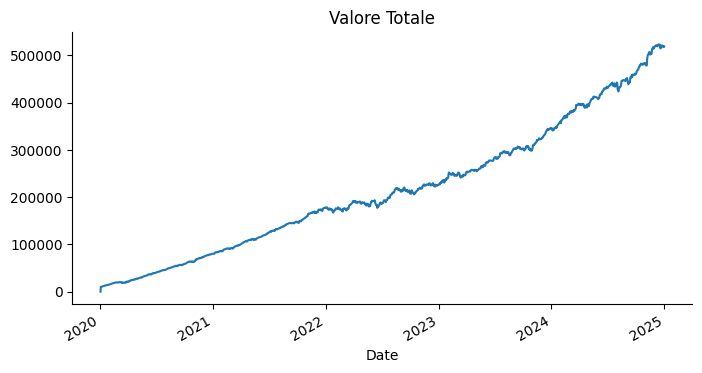

In [130]:
from matplotlib import pyplot as plt
simulazione3['Valore Totale'].plot(kind='line', figsize=(8, 4), title='Valore Totale')
plt.gca().spines[['top', 'right']].set_visible(False)